[54, 66, 61, 70, 59, 63, 58, 57, 68, 62, 69, 56, 65, 67, 64, 60, 55]
[55, 67, 62, 60, 64, 59, 58, 69, 63, 70, 57, 66, 68, 65, 61, 56, 54]
[56, 68, 63, 61, 65, 60, 59, 70, 64, 58, 54, 67, 69, 66, 62, 57, 55]
[57, 69, 64, 62, 66, 61, 60, 54, 65, 59, 55, 68, 70, 67, 63, 58, 56]
[58, 70, 65, 63, 67, 62, 54, 61, 55, 66, 60, 56, 69, 68, 64, 59, 57]
[59, 66, 64, 54, 68, 63, 55, 62, 56, 67, 61, 57, 70, 69, 65, 60, 58]
[60, 67, 65, 55, 69, 64, 56, 63, 57, 68, 62, 58, 70, 66, 54, 61, 59]
[61, 68, 54, 66, 56, 70, 65, 57, 64, 58, 69, 63, 59, 67, 55, 62, 60]
[62, 69, 55, 67, 57, 66, 58, 65, 59, 70, 54, 64, 60, 68, 56, 63, 61]
[63, 70, 56, 68, 58, 54, 67, 59, 66, 60, 55, 65, 61, 69, 57, 64, 62]
[64, 57, 69, 59, 55, 68, 60, 67, 61, 56, 66, 62, 54, 70, 58, 65, 63]
[65, 58, 70, 60, 56, 69, 61, 68, 62, 57, 67, 63, 54, 55, 59, 66, 64]
[66, 54, 59, 61, 57, 70, 62, 69, 63, 58, 68, 64, 55, 56, 60, 67, 65]
[67, 55, 60, 62, 58, 63, 70, 64, 59, 69, 65, 56, 54, 57, 61, 68, 66]
[68, 56, 61, 63, 59, 64, 65, 54, 6

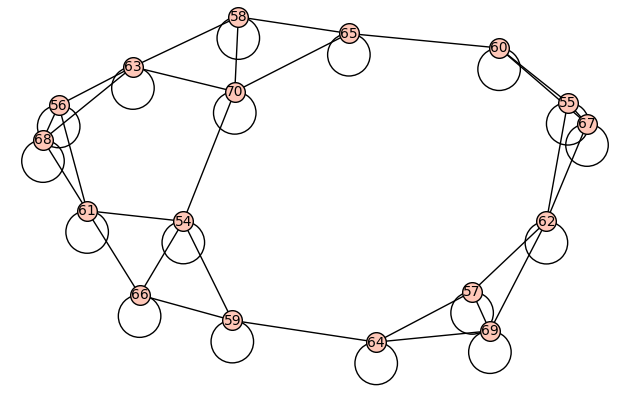

True
{54: {54: 0.0, 59: 1.35400640077266, 66: 1.0, 61: 1.2909944487358056, 70: 1.3416407864998738}, 66: {54: 1.0, 59: 1.2909944487358056, 66: 0.0, 61: 1.35400640077266}, 61: {54: 1.2909944487358056, 66: 1.35400640077266, 61: 0.0, 56: 1.35400640077266, 68: 1.2909944487358056}, 70: {54: 1.3416407864998738, 70: 0.0, 63: 1.2909944487358056, 58: 1.0, 65: 1.35400640077266}, 55: {55: 0.0, 67: 1.0, 62: 1.2909944487358056, 60: 1.35400640077266}, 67: {55: 1.0, 67: 0.0, 62: 1.35400640077266, 60: 1.2909944487358056}, 62: {55: 1.2909944487358056, 67: 1.35400640077266, 62: 0.0, 57: 1.35400640077266, 69: 1.2909944487358056}, 60: {55: 1.35400640077266, 67: 1.2909944487358056, 60: 0.0, 65: 1.35400640077266}, 56: {61: 1.35400640077266, 56: 0.0, 68: 1.0, 63: 1.2909944487358056}, 68: {61: 1.2909944487358056, 56: 1.0, 68: 0.0, 63: 1.35400640077266}, 63: {70: 1.2909944487358056, 56: 1.2909944487358056, 68: 1.35400640077266, 63: 0.0, 58: 1.35400640077266}, 57: {62: 1.35400640077266, 57: 0.0, 69: 1.0, 64: 1.2

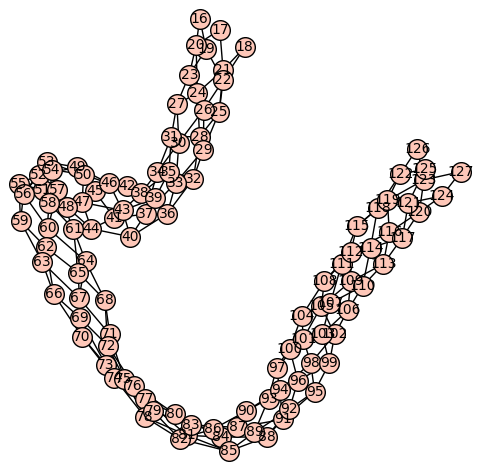

written


In [233]:
import numpy as np


def writeYaml(filename,dictionary):    
    import yaml
    import io

    # Write YAML file
    with io.open(filename, 'w', encoding='utf8') as outfile:
        yaml.dump(dictionary, outfile, default_flow_style=False, allow_unicode=True)

def readYaml(filename):        
    # Read YAML file
    import yaml
    with open(filename, 'r') as stream:
        data_loaded = yaml.safe_load(stream)
    return data_loaded 

def getRational(k):
    alpha = 2**(1/12.0)
    x = RDF(alpha**k).n(50)
    return x.nearby_rational(max_error=0.01*x)

def kernPitch(k1,k2):
    q = getRational(k2-k1)
    a,b = q.numerator(),q.denominator()
    return gcd(a,b)**2/(a*b)
    #return 2*gcd(a,b)**3/(a*b*(a+b))

G = Graph(loops=True)
KNN = 1+3
idp = list(range(60-6,64+12+1-6))
pitchsim = dict([])
for p1 in idp:
    G.add_vertex(p1)
    sp = sorted([(kernPitch(p1,p2),p2) for p2 in idp ],reverse=True)
    perm = [x[1] for x in sp]
    pitchsim[p1] = perm
    print(perm)
    ss = sp[0:KNN]
    for t in ss:
        k,p = t
        G.add_edge(p1,p,float(np.sqrt(2*(1-k))))
plot(G).show()     
print(G.is_connected())
print(G.to_dictionary(edge_labels=True))

writeYaml("pitch_similarity.yaml",pitchsim)
writeYaml("simliarity_graph_3.yaml",dict(G.to_dictionary(edge_labels=True)))

def writePitches(fn,inds,tempo=82,instrument=[0,0],add21=True,start_at= [0,0],durationsInQuarterNotes=False):
    from MidiFile import MIDIFile

    track    = 0
    channel  = 0
    time     = 0   # In beats
    duration = 1   # In beats # In BPM
    volume   = 116 # 0-127, as per the MIDI standard

    ni = len(inds)
    MyMIDI = MIDIFile(ni,adjust_origin=False) # One track, defaults to format 1 (tempo track
                     # automatically created)
    MyMIDI.addTempo(track,time, tempo)


    for k in range(ni):
        MyMIDI.addProgramChange(k,k,0,instrument[k])


    times = start_at
    for k in range(len(inds)):
        channel = k
        track = k
        for i in range(len(inds[k])):
            pitch,duration,volume,isPause,tempo = inds[k][i]
            #print(pitch,duration,volume,isPause)
            track = k
            channel = k
            if not durationsInQuarterNotes:
                duration = 4*duration#*maxDurations[k] #findNearestDuration(duration*12*4)            
            #print(k,pitch,times[k],duration,100)
            if not isPause: #rest
                #print(volumes[i])
                # because of median:
                pitch = int(np.floor(pitch))
                if add21:
                    pitch += 21
                #print(pitch,times[k],duration,volume,isPause)    
                MyMIDI.addTempo(track,times[k], tempo)
                MyMIDI.addNote(track, channel, int(pitch), float(times[k]) , float(duration), int(volume))
                times[k] += duration*1.0  
            else:
                times[k] += duration*1.0
       
    with open(fn, "wb") as output_file:
        MyMIDI.writeFile(output_file)
    print("written")  

def run_length_encoding(seq):
    compressed = []
    count = 1
    char = seq[0]
    for i in range(1,len(seq)):
        if seq[i] == char:
            count = count + 1
        else:
            compressed.append([char,count])
            char = seq[i]
            count = 1
    compressed.append([char,count])
    return compressed

def getComposition(s):
    v = log(s)/log(2)
    k = int(floor(v))
    d = Integer(s).digits(2,padto=k+1)
    rl = run_length_encoding(d)
    #print(t,d,rl)
    comp  = [x[1] for x in rl]
    return comp    

def getEncoding(s):
    v = log(s)/log(2)
    k = int(floor(v))
    d = Integer(s).digits(2,padto=k+1)
    return [i for i in range(len(d)) if d[i]==1]

def jacc(s1,s2):
    return len(s1.intersection(s2))/len(s1.union(s2))

def compositionSim(n1,n2):
    return jacc(set(getEncoding(n1)),set(getEncoding(n2)))


#compsim = dict([])
#for n1 in range(1,200):
#    ss = sorted([(compositionSim(n1,n2),-n2) for n2 in range(1,200)],reverse=True)
#    perm = [-x[1] for x in ss]
#    print(perm)
#    compsim[n1] = perm


def HH(start,end):
    H = Graph(loops=False)
    for a in range(start,end+1):
        H.add_vertex(a)
        for b in range(start,end+1):
            if abs(a-b) in [3,4]:
                H.add_edge(a,b)
    return H 

H = HH(16,127)
H.plot().show()


iinds = []
seq = [1,1,2,3,3,2,1,1]
comps = [44,2340] #50] #,52,54] #
ccomps = [[2,2,2],[1,1,1,1,1,1],[1,2,1,2,1,2,1,2],[2,1,2,1,2,1,2,1]]
#comps = [20,22,26] #,36,38,44,50,52,54]
vols = [32,48,64,64+16,96]
rndbits = [int(x)%2 for x in (str(pi.n(10000)))[2:]]
for r in range(len(ccomps)):
    sv = 50
    vols = []    
    noten = []
    lh=  []
    rh = []    
    durations = []
    for n in range(1,65):
        #cc = getComposition(comps[r])
        cc = ccomps[r]
        S = sum(cc)
        durations.extend([(c/S,n) for c in cc])
    k = 0   
    start = 60-6
    ps = pitchsim[start][0:seq[(k)%len(seq)]]
    ps.reverse() 
    v = 1
    sign = +1
    l = 0
    sd = 0
    while len(durations)>=len(ps):
        if v == len(vols)-1:
            sign = -1
        if v == 0:
            sign = +1
        for i in range(len(ps)):
            vols.extend(H.shortest_path(sv,(sv+10)%(127-16)+16))
            #print(vols)
            sv = vols[-1]
            vol = vols.pop(0)        
            dur,num = durations.pop(0)
            sd+=dur
            octl = (num+r)%3
            octr = (num+r)%2
            if num%4==0:
                octl = 0
                octr = 0
            dd = Integer(num).digits(2,padto=len(ccomps))
            dd.reverse()
            pitch = ps[i]
            pause = (dd[r]==0 and num<=7) or (7<num<=18 and False) or (num>18 and dd[r]==0)
            tempo = 60 if num <= 7 else 120 if num <=18 else 120 if num<=31 else 90 if num<=42 else 120
            noten.append((ps[i],dur,vol,pause,tempo))
            nl = (pitch+3*octl,dur,vol-6*octl,pause,tempo)
            nr = (pitch-4*octr,dur,vol-6*octr,pause,tempo)
            lh.append(nl)
            rh.append(nr)                         
        v+=sign
        start = ps[-1]
        k+=1
        ps = pitchsim[start][0:seq[(k)%len(seq)]]
        #if rndbits.pop(0)==1:
        ps.reverse()        
    iinds.append(noten) 
    if r==0:
        iinds.append(lh)                         
    if r==0:
        iinds.append(rh)                         
fn = "./midi/nothing_ahead.mid"    
writePitches(fn,iinds,tempo=60,instrument=(len(iinds))*[0],add21=False,start_at= len(iinds)*[0],durationsInQuarterNotes=False)        


In [181]:
for n in range(1,4000):
    cc = getComposition(n)
    if sum(cc)==12 and set(cc)==set([1,2]):
        print(n,getComposition(n))

2340 [2, 1, 2, 1, 2, 1, 2, 1]
2341 [1, 1, 1, 2, 1, 2, 1, 2, 1]
2342 [1, 2, 2, 1, 2, 1, 2, 1]
2345 [1, 2, 1, 1, 1, 2, 1, 2, 1]
2346 [1, 1, 1, 1, 1, 1, 2, 1, 2, 1]
2347 [2, 1, 1, 1, 1, 2, 1, 2, 1]
2348 [2, 2, 1, 1, 2, 1, 2, 1]
2349 [1, 1, 2, 1, 1, 2, 1, 2, 1]
2354 [1, 1, 2, 2, 2, 1, 2, 1]
2355 [2, 2, 2, 2, 1, 2, 1]
2356 [2, 1, 1, 2, 2, 1, 2, 1]
2357 [1, 1, 1, 1, 2, 2, 1, 2, 1]
2358 [1, 2, 1, 2, 2, 1, 2, 1]
2377 [1, 2, 1, 2, 1, 1, 1, 2, 1]
2378 [1, 1, 1, 1, 2, 1, 1, 1, 2, 1]
2379 [2, 1, 1, 2, 1, 1, 1, 2, 1]
2380 [2, 2, 2, 1, 1, 1, 2, 1]
2381 [1, 1, 2, 2, 1, 1, 1, 2, 1]
2386 [1, 1, 2, 1, 1, 1, 1, 1, 2, 1]
2387 [2, 2, 1, 1, 1, 1, 1, 2, 1]
2388 [2, 1, 1, 1, 1, 1, 1, 1, 2, 1]
2389 [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1]
2390 [1, 2, 1, 1, 1, 1, 1, 1, 2, 1]
2393 [1, 2, 2, 1, 1, 1, 1, 2, 1]
2394 [1, 1, 1, 2, 1, 1, 1, 1, 2, 1]
2395 [2, 1, 2, 1, 1, 1, 1, 2, 1]
2404 [2, 1, 2, 2, 1, 1, 2, 1]
2405 [1, 1, 1, 2, 2, 1, 1, 2, 1]
2406 [1, 2, 2, 2, 1, 1, 2, 1]
2409 [1, 2, 1, 1, 2, 1, 1, 2, 1]
2410 [1, 1, 1, 1, 1